In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
from Bio import Phylo
from io import StringIO
import numpy as np

import pandas as pd
import itertools
from matplotlib import pyplot as plt

In [3]:
import pairwise_weighting

In [4]:
tree = Phylo.read('/Users/adamhockenberry/Downloads/BM_Folder/paper_tree.txt', 'newick')
# tree = Phylo.read('/Users/adamhockenberry/Projects/Tree_rooting/Data/OMA_group_data/eukaryotes/processed_OMA_trees/OMAGroup_489052.treefile.NoZeroTerms.Rooted.MADAJH', 'newick')
# tree = Phylo.read(StringIO('(((A:20, B:20):30,C:50):30, D:80)'), 'newick', rooted=False)
# tree = Phylo.read(StringIO('((A:25,B:25):25, C:50)'), 'newick', rooted=False)
# tree = Phylo.read(StringIO('(((A:2, Aprime:2):23,B:25):25, C:50)'), 'newick', rooted=False)
# tree = Phylo.read(StringIO('(((A:3, B:5):4,C:9):5, (D:7, E:3):15)'), 'newick', rooted=False)

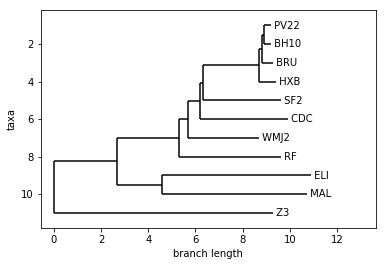

In [5]:
Phylo.draw(tree)

In [ ]:
# tree.root_with_outgroup(['A', 'B', 'C'], outgroup_branch_length=5)
# tree.root.clades[0].branch_length = 15.
# Phylo.draw(tree)

In [ ]:
# term_count = len(tree.get_terminals())
# starting_matrix = np.zeros((term_count, term_count))
# terms = [i.name for i in tree.get_terminals()]
# tree.root.branch_length = 0.

# starting_df = pd.DataFrame(starting_matrix, index=terms, columns=terms)
# ending_df = recursive_TEST_df(tree.root, tree, starting_df)
# tree.root.branch_length = None
# ending_df

In [42]:
term_count = len(tree.get_terminals())
starting_matrix_weighted = np.zeros((term_count, term_count))
starting_matrix_raw = np.zeros((term_count, term_count))
tree.root.branch_length = 0.
term_pairs = enumerate(tree.get_terminals())
term_pairs = [(pair[1], pair[0]) for pair in term_pairs]
term_dict = dict(term_pairs)

ending_matrix_weighted, ending_matrix_raw, finished\
        = pairwise_weighting.pairwise_distances_recursive(tree.root, tree,\
                                                          starting_matrix_weighted,\
                                                          starting_matrix_raw,\
                                                          term_dict, [])
tree.root.branch_length = None

In [43]:
ending_matrix_normalized = np.divide(ending_matrix_weighted, ending_matrix_raw,\
                                     out=np.zeros_like(ending_matrix_weighted), where=ending_matrix_raw!=0)


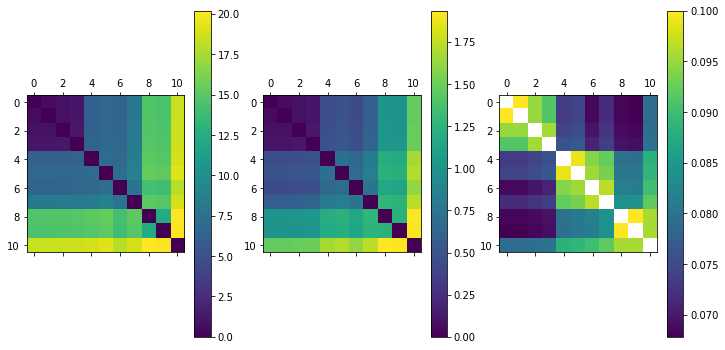

In [44]:
fig, ax_arr = plt.subplots(ncols=3, nrows=1, figsize=(12,6))
data = ax_arr[0].matshow(ending_matrix_raw)
fig.colorbar(data, ax=ax_arr[0])
data = ax_arr[1].matshow(ending_matrix_weighted)
fig.colorbar(data, ax=ax_arr[1])
data = ax_arr[2].matshow(matrix_normalized)
fig.colorbar(data, ax=ax_arr[2])




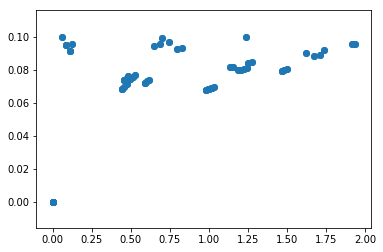

In [45]:
fig, ax = plt.subplots()
ax.scatter(ending_matrix_weighted.flatten(), ending_matrix_normalized.flatten())

# A (slow) way to test the construction of the raw matrix at least

In [41]:
listy = []
for i in tree.get_terminals():
    row = []
    for j in tree.get_terminals():
        row.append(tree.distance(i,j))
        print(i.name, j.name, tree.distance(i,j))
    listy.append(row)
inefficient_matrix = np.array(listy)
np.array_equal(ending_matrix_raw, inefficient_matrix)

PV22 PV22 0
PV22 BH10 0.6
PV22 BRU 0.9
PV22 HXB 1.2
PV22 SF2 6.199999999999999
PV22 CDC 6.7
PV22 WMJ2 6.5
PV22 RF 8.2
PV22 ELI 14.7
PV22 MAL 14.5
PV22 Z3 18.5
BH10 PV22 0.6
BH10 BH10 0
BH10 BRU 0.9
BH10 HXB 1.2
BH10 SF2 6.199999999999999
BH10 CDC 6.7
BH10 WMJ2 6.5
BH10 RF 8.2
BH10 ELI 14.7
BH10 MAL 14.5
BH10 Z3 18.5
BRU PV22 0.9
BRU BH10 0.9
BRU BRU 0
BRU HXB 1.2999999999999998
BRU SF2 6.3
BRU CDC 6.800000000000001
BRU WMJ2 6.6
BRU RF 8.3
BRU ELI 14.799999999999999
BRU MAL 14.6
BRU Z3 18.6
HXB PV22 1.2
HXB BH10 1.2
HXB BRU 1.2999999999999998
HXB HXB 0
HXB SF2 6.3999999999999995
HXB CDC 6.9
HXB WMJ2 6.7
HXB RF 8.399999999999999
HXB ELI 14.899999999999999
HXB MAL 14.7
HXB Z3 18.700000000000003
SF2 PV22 6.199999999999999
SF2 BH10 6.199999999999999
SF2 BRU 6.3
SF2 HXB 6.3999999999999995
SF2 SF2 0
SF2 CDC 7.1
SF2 WMJ2 6.9
SF2 RF 8.6
SF2 ELI 15.1
SF2 MAL 14.9
SF2 Z3 18.900000000000002
CDC PV22 6.7
CDC BH10 6.7
CDC BRU 6.800000000000001
CDC HXB 6.9
CDC SF2 7.1
CDC CDC 0
CDC WMJ2 7.2
CDC RF 8.

False

In [11]:
print(np.max(ending_matrix_raw-inefficient_matrix))

1.7763568394e-15
